In [1]:
import json
from hydra import compose, initialize
from pathlib import Path
from itertools import chain
import pandas as pd
import numpy as np
from rdkit import Chem
from IPython.display import SVG
import matplotlib.pyplot as plt
from ergochemics.draw import draw_molecule
from cgr.inference import ReactantGraph
from collections import defaultdict
from scipy.stats import hmean, gmean
from ergochemics.mapping import rc_to_nest

In [2]:
with initialize(version_base=None, config_path="../configs/filepaths"):
    filepaths = compose(config_name="filepaths")

krs = Path(filepaths.data) / "raw" / "sprhea_240310_v3_mapped_no_subunits.json"
with open(krs, 'r') as f:
    krs = json.load(f)

decarb = {k: v for k,v  in krs.items() if v['min_rule'] == 'rule0024'}

with open(Path(filepaths.raw_data) / 'decarbs.json', 'w') as f:
    json.dump(decarb, f)

print(len(decarb))

86


In [3]:
embed_mat = np.load(Path(filepaths.interim_data) / 'decarb' / 'decarb_bfm.npy')
examples = pd.read_parquet(Path(filepaths.interim_data) / 'decarb' / 'subgraph_examples.parquet')

In [4]:
p1 = embed_mat.sum(axis=0) / embed_mat.shape[0]
sgids = np.argsort(p1)[::-1]
examples['reaction_center'] = examples['reaction_center'].apply(rc_to_nest)
examples.head()

subgraph_id rxn_id                                             smarts  \
0            0     14  *C(=O)OCC(COP(=O)(O)OCC(N)C(=O)O)OC(*)=O>>*C(=...   
1            1     14  *C(=O)OCC(COP(=O)(O)OCC(N)C(=O)O)OC(*)=O>>*C(=...   
2            2     14  *C(=O)OCC(COP(=O)(O)OCC(N)C(=O)O)OC(*)=O>>*C(=...   
3            3     14  *C(=O)OCC(COP(=O)(O)OCC(N)C(=O)O)OC(*)=O>>*C(=...   
4            4     14  *C(=O)OCC(COP(=O)(O)OCC(N)C(=O)O)OC(*)=O>>*C(=...   

  sg_idxs           reaction_center  
0    [13]  (((13, 15, 17),), ((),))  
1    [12]  (((13, 15, 17),), ((),))  
2     [6]  (((13, 15, 17),), ((),))  
3    [10]  (((13, 15, 17),), ((),))  
4     [4]  (((13, 15, 17),), ((),))

Visualize features

Subgraph id: 65
Probability: 0.40
Example shown: 55


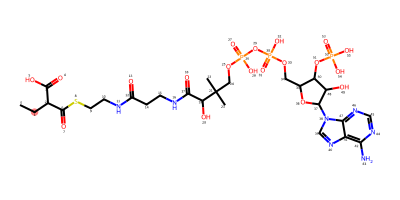

Subgraph id: 730
Probability: 0.38
Example shown: 14


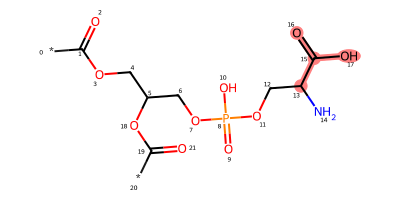

Subgraph id: 0
Probability: 0.38
Example shown: 14


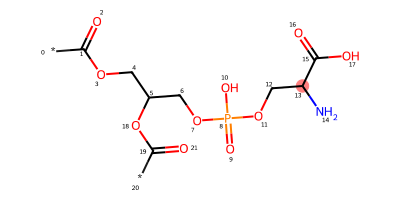

Subgraph id: 7
Probability: 0.34
Example shown: 14


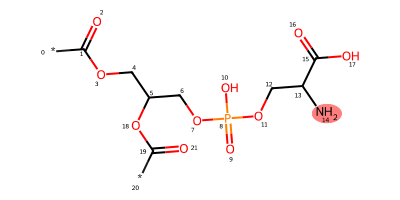

Subgraph id: 325
Probability: 0.34
Example shown: 14


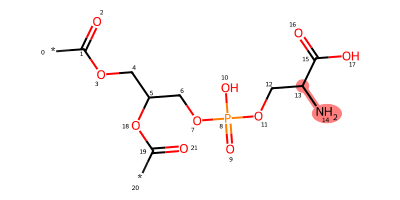

Subgraph id: 94
Probability: 0.23
Example shown: 1067


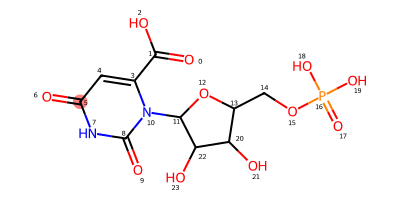

Subgraph id: 1089
Probability: 0.22
Example shown: 734


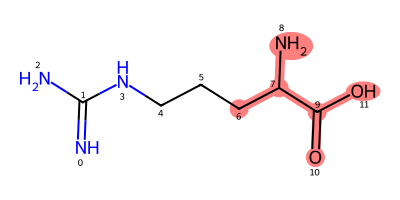

Subgraph id: 754
Probability: 0.22
Example shown: 734


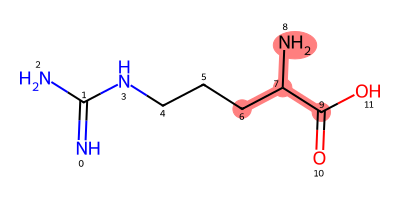

Subgraph id: 122
Probability: 0.22
Example shown: 2556


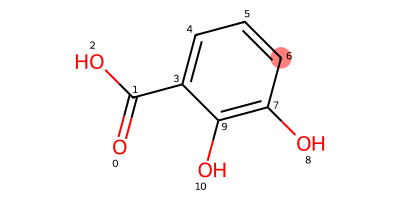

Subgraph id: 197
Probability: 0.21
Example shown: 4489


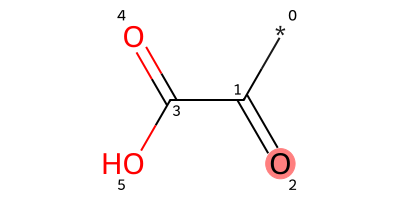

Subgraph id: 79
Probability: 0.21
Example shown: 121


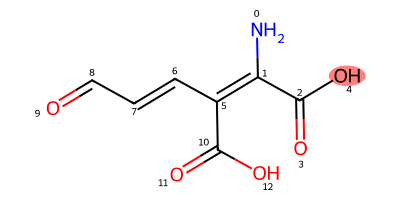

Subgraph id: 85
Probability: 0.20
Example shown: 734


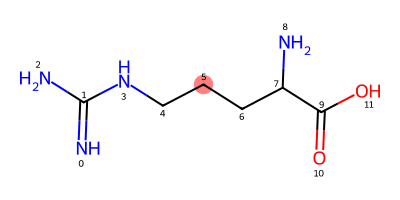

Subgraph id: 78
Probability: 0.17
Example shown: 121


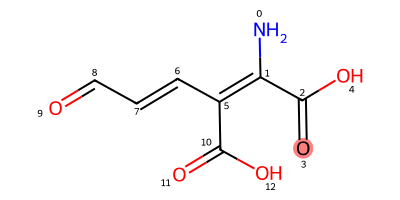

Subgraph id: 399
Probability: 0.17
Example shown: 5026


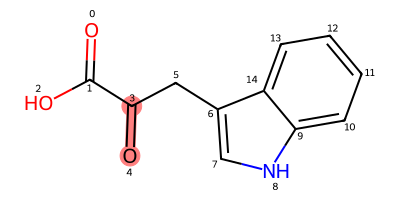

Subgraph id: 202
Probability: 0.17
Example shown: 4590


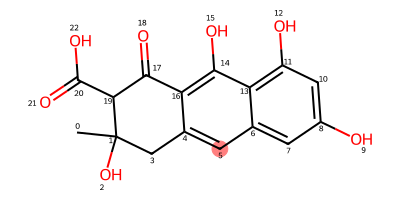

Subgraph id: 833
Probability: 0.17
Example shown: 5026


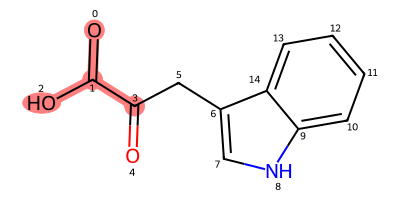

In [15]:
topk = 15
ct = 0
for sgid in sgids:
    if ct > topk:
        break

    if p1[sgid] == 1:
        continue

    ex = examples.loc[examples['subgraph_id'] == sgid].iloc[0]
    sma = ex['smarts']
    rcts = sma.split('>>')[0]
    rcts = Chem.MolFromSmiles(rcts)
    sg_idxs = ex['sg_idxs'].tolist()
    print(f"Subgraph id: {sgid}")
    print(f"Probability: {p1[sgid]:.2f}")
    print(f"Example shown: {ex['rxn_id']}")
    display(SVG(draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})))
    ct += 1
    

In [6]:
rxn_id = 734
len(examples.loc[examples['rxn_id'] == str(rxn_id)])
examples.loc[examples['rxn_id'] == str(rxn_id)].head()

subgraph_id rxn_id                                    smarts sg_idxs  \
284            0    734  N=C(N)NCCCC(N)C(=O)O>>N=C(N)NCCCCN.O=C=O     [7]   
285           65    734  N=C(N)NCCCC(N)C(=O)O>>N=C(N)NCCCCN.O=C=O     [6]   
286           81    734  N=C(N)NCCCC(N)C(=O)O>>N=C(N)NCCCCN.O=C=O     [0]   
287           82    734  N=C(N)NCCCC(N)C(=O)O>>N=C(N)NCCCCN.O=C=O     [3]   
288            7    734  N=C(N)NCCCC(N)C(=O)O>>N=C(N)NCCCCN.O=C=O     [8]   

            reaction_center  
284  (((7, 9, 11),), ((),))  
285  (((7, 9, 11),), ((),))  
286  (((7, 9, 11),), ((),))  
287  (((7, 9, 11),), ((),))  
288  (((7, 9, 11),), ((),))

Subgraph id: 321
Probability: 1.00


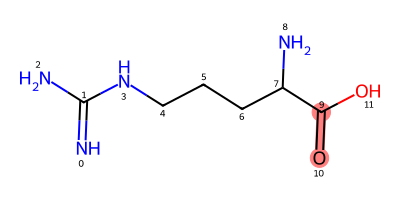

Subgraph id: 15
Probability: 1.00


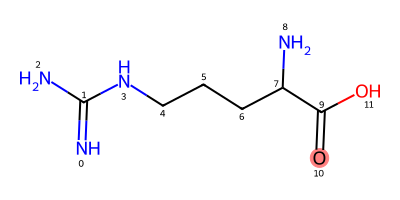

Subgraph id: 14
Probability: 1.00


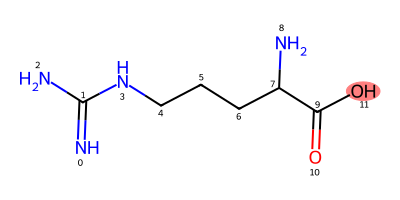

Subgraph id: 8
Probability: 1.00


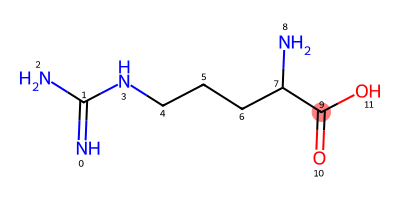

Subgraph id: 324
Probability: 1.00


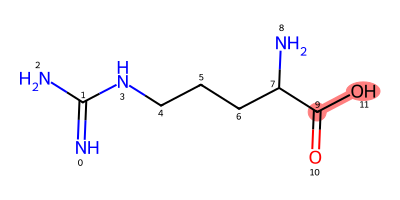

Subgraph id: 65
Probability: 0.40


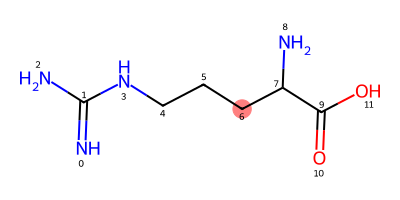

Subgraph id: 0
Probability: 0.38


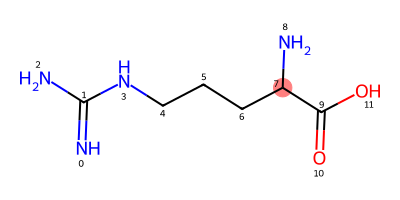

Subgraph id: 730
Probability: 0.38


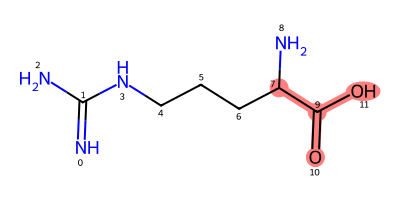

Subgraph id: 7
Probability: 0.34


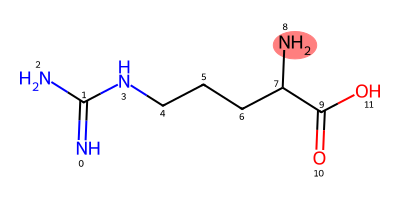

Subgraph id: 325
Probability: 0.34


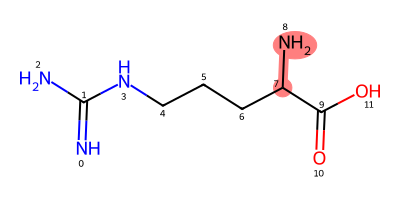

In [7]:
topk = 10
ct = 0
atom_probs = defaultdict(list)
rxn_of_interest = examples.loc[examples['rxn_id'] == str(rxn_id)].sort_values(by='subgraph_id', key=lambda x: p1[x], ascending=False)
for i, subgraph in rxn_of_interest.iterrows():
    sma = subgraph['smarts']
    sgid = subgraph["subgraph_id"]
    sg_idxs = subgraph['sg_idxs'].tolist()
    
    for idx in sg_idxs:
        atom_probs[idx].append(p1[sgid])

    if ct < topk:
        rcts = sma.split('>>')[0]
        rcts = Chem.MolFromSmiles(rcts)
        print(f"Subgraph id: {sgid}")
        print(f"Probability: {p1[sgid]:.2f}")
        display(SVG(draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})))
    
    
    ct += 1

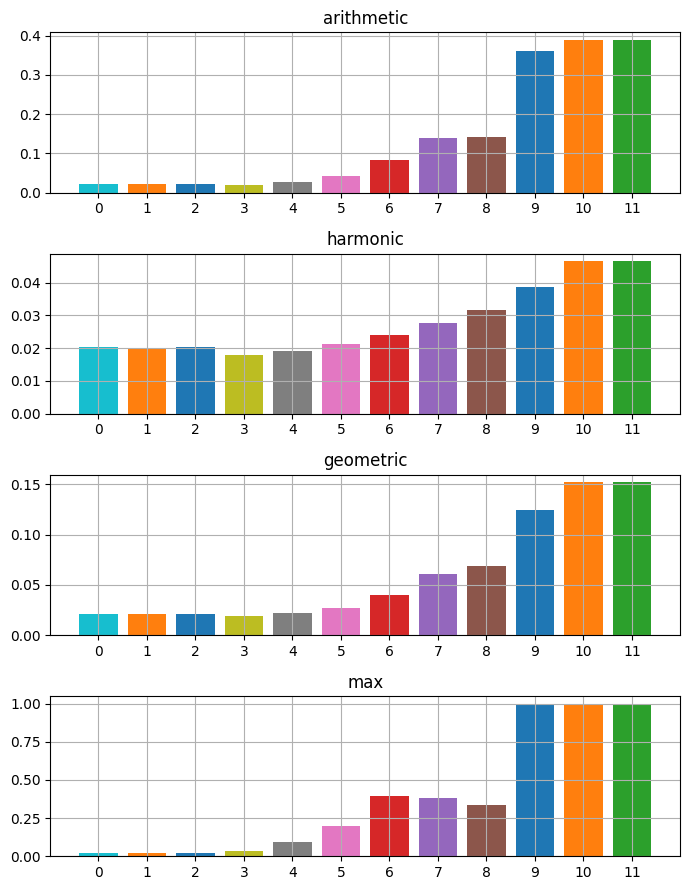

In [8]:
aggs = {
    "arithmetic": np.mean,
    "harmonic": hmean,
    "geometric": gmean,
    "max": np.max
}

fig, ax = plt.subplots(ncols=1, nrows=len(aggs), figsize=(7, 9))   
for i, (agg, func) in enumerate(aggs.items()):
    for idx, probs in atom_probs.items():
        ax[i].bar(idx, func(probs))
    ax[i].set_title(agg)
    ax[i].set_xticks(np.arange(len(atom_probs)))
    ax[i].grid()
plt.tight_layout()
plt.show()

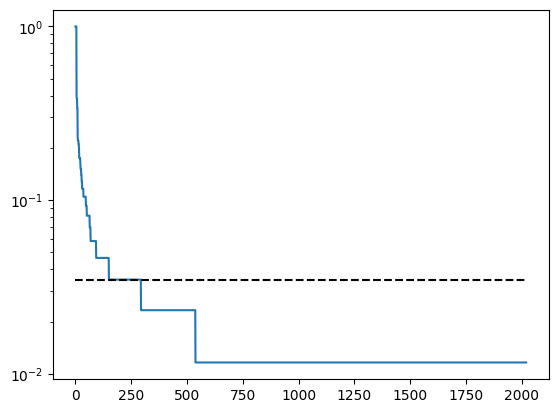

In [9]:
fig, ax = plt.subplots()
ax.plot(np.sort(p1)[::-1])
ax.hlines(3 / embed_mat.shape[0], 0, embed_mat.shape[1], colors='black', linestyles='--')
ax.set_yscale('log')
plt.show()

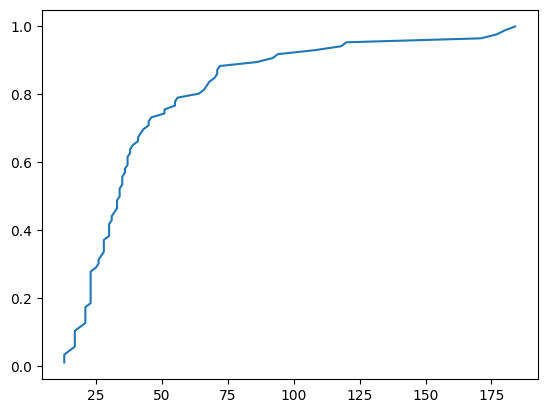

In [10]:
sg_cts = embed_mat.sum(axis=1) #/ embed_mat.shape[1]
srt_sg_cts = np.sort(sg_cts)
ycdf = np.arange(1, len(srt_sg_cts) + 1) / len(srt_sg_cts)
fig, ax = plt.subplots()
ax.plot(srt_sg_cts, ycdf)
plt.show()


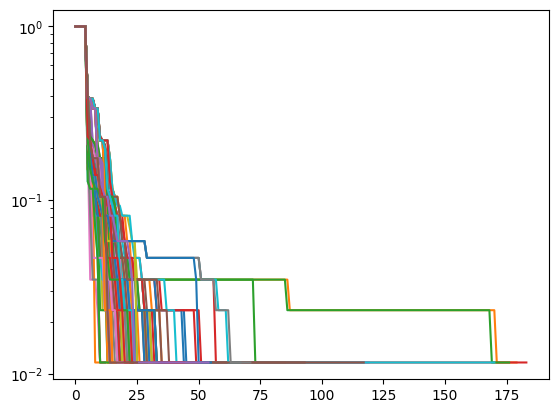

In [20]:
sgids_by_rxn = [np.nonzero(embed_mat[i])[0] for i in range(embed_mat.shape[0])]

fig, ax = plt.subplots()
for row in sgids_by_rxn:
    row_probs = np.sort(p1[row])[::-1]
    ax.plot(row_probs)

ax.set_yscale('log')
plt.show()

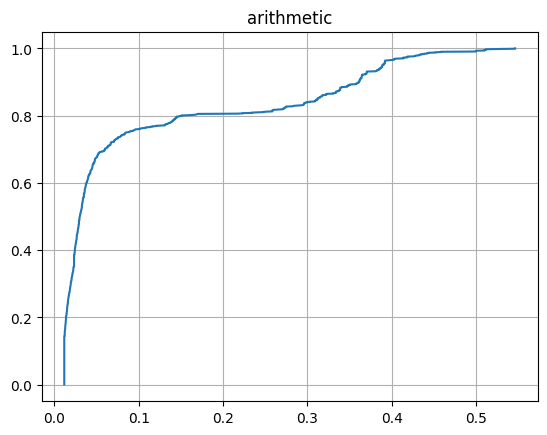

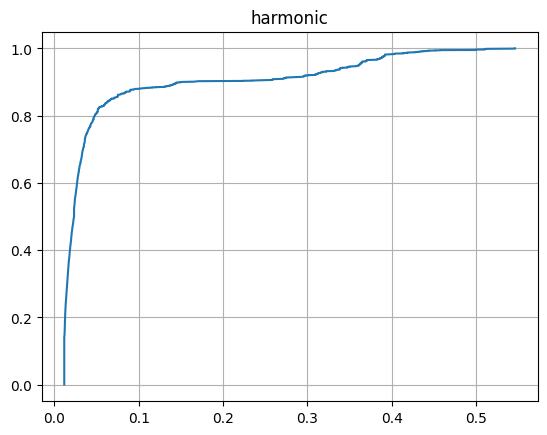

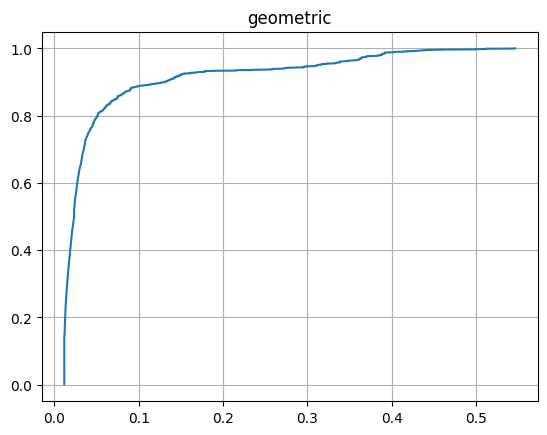

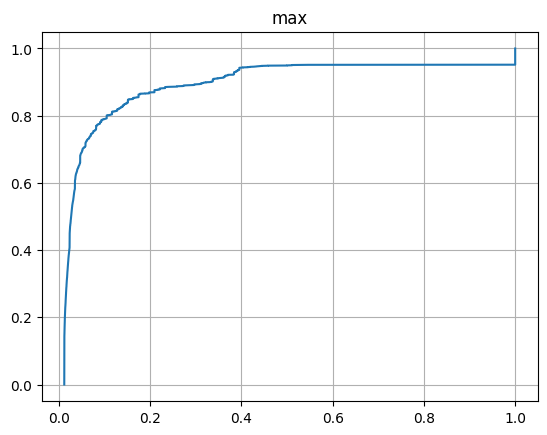

In [11]:
all_atom_probs = defaultdict(list)
for _, row in examples.iterrows():
    rxn_id = row['rxn_id']
    sgid = row['subgraph_id']
    for aidx in row['sg_idxs']:
        all_atom_probs[f"{rxn_id}_{aidx}"].append(p1[sgid])

mean_probs = []
for i, (agg, func) in enumerate(aggs.items()):
    for idx, probs in all_atom_probs.items():
        mean_probs.append(func(probs))
    fig, ax = plt.subplots()
    ycdf = np.arange(1, len(mean_probs) + 1) / len(mean_probs)
    ax.plot(np.sort(mean_probs), ycdf)
    ax.grid()
    ax.set_title(agg)
    plt.show()

Subgraph id: 730
Probability: 0.38


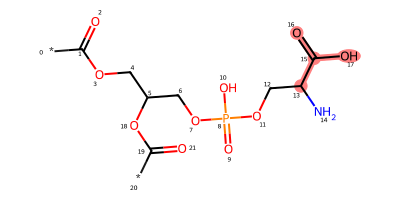

Subgraph id: 730
Probability: 0.38


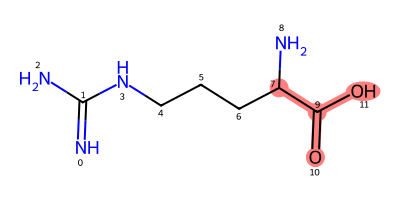

Subgraph id: 730
Probability: 0.38


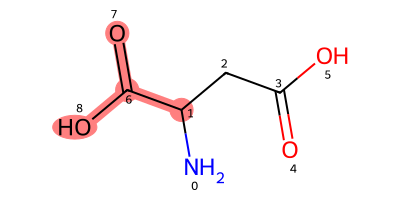

Subgraph id: 730
Probability: 0.38


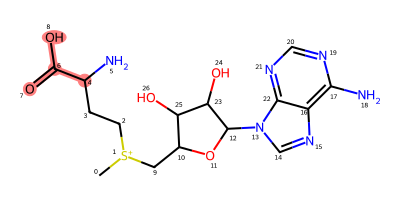

Subgraph id: 730
Probability: 0.38


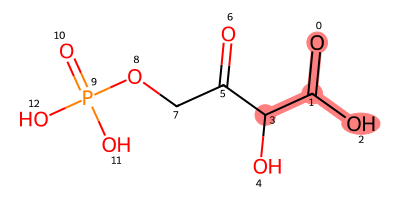

In [12]:
sgid = 730
ct = 0
for i, ex in examples.loc[examples['subgraph_id'] == sgid].iterrows():
    if ct > 4:
        break

    sma = ex['smarts']
    rcts = sma.split('>>')[0]
    rcts = Chem.MolFromSmiles(rcts)
    sg_idxs = ex['sg_idxs'].tolist()
    print(f"Subgraph id: {sgid}")
    print(f"Probability: {p1[sgid]:.2f}")
    display(SVG(draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})))
    
    ct +=1

[0, 1, 2, 3, 9, 8, 6]
Example shown: 3306


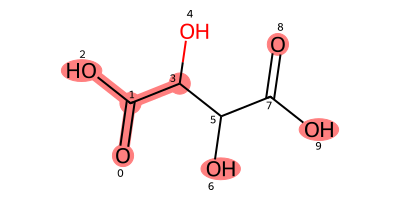

[5, 6, 7, 2, 4, 1, 3]
Example shown: 3306


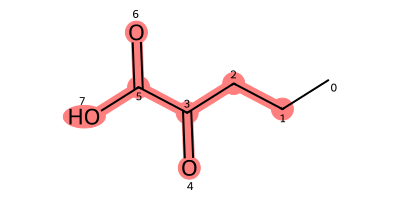

[7, 8, 9, 4, 6, 3, 5, 2]
Example shown: 3306


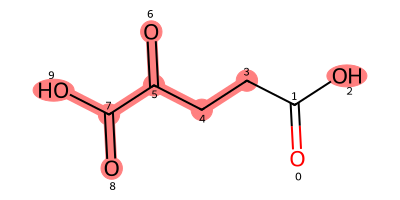

[6, 7, 8, 5, 1, 4]
Example shown: 3306


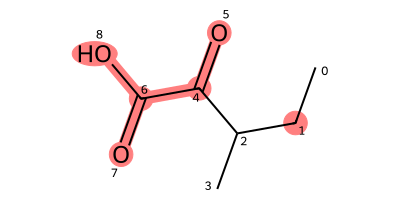

[0, 1, 2, 5, 6, 12, 8]
Example shown: 3306


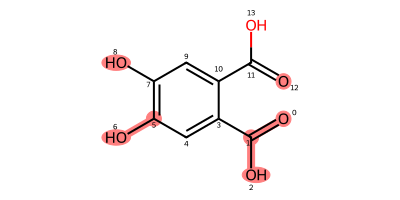

[13, 14, 15, 2, 1, 0, 3, 4, 11]
Example shown: 3306


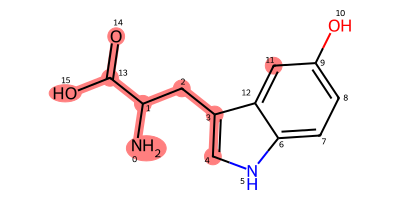

[0, 1, 2, 5, 6, 23]
Example shown: 3306


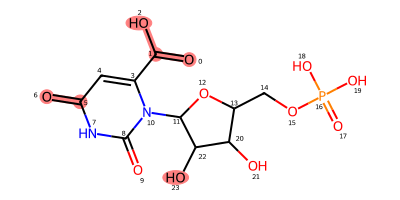

[9, 10, 11, 6, 7, 8]
Example shown: 3306


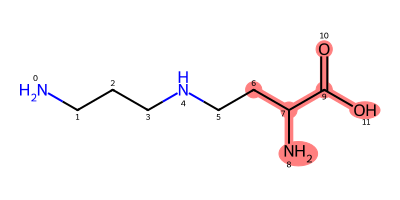

[8, 9, 10, 1, 0, 2, 7]
Example shown: 3306


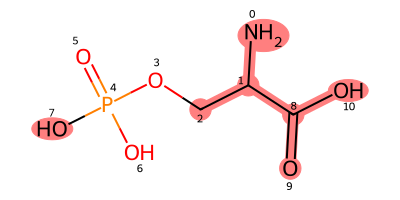

[6, 7, 8, 2, 1, 0, 5, 4]
Example shown: 3306


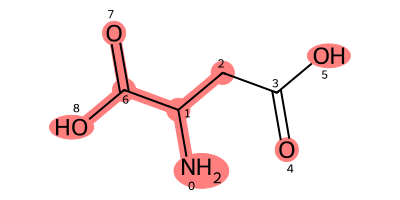

[10, 11, 12, 4, 3]
Example shown: 3306


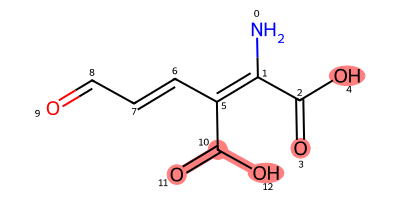

[7, 8, 9, 1, 0, 6, 5, 2]
Example shown: 3306


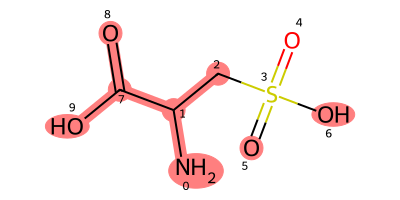

[11, 12, 13, 8, 9, 10, 7, 6]
Example shown: 3306


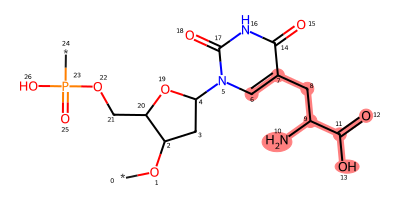

[7, 8, 9, 4, 5, 6, 3]
Example shown: 3306


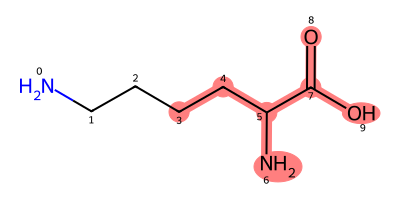

[0, 1, 2, 5, 6, 7, 4, 3, 8]
Example shown: 3306


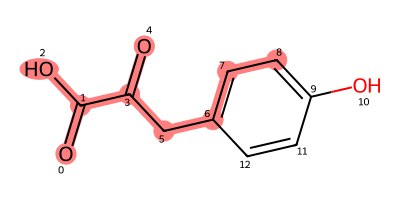

[4, 5, 6, 1, 0, 2, 3]
Example shown: 3306


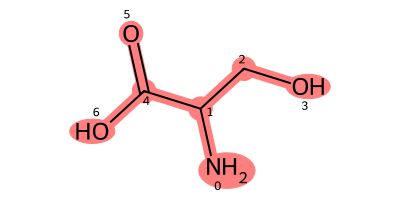

[0, 1, 2, 6, 9]
Example shown: 3306


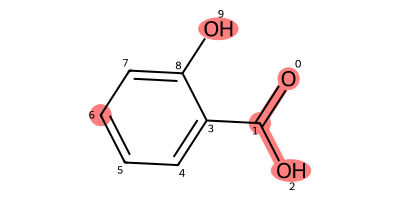

[15, 16, 17, 13, 14, 12, 10]
Example shown: 3306


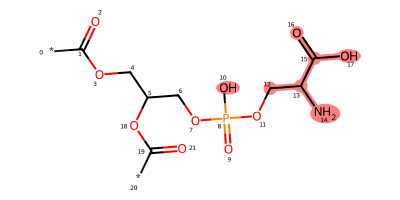

[4, 5, 6, 1, 3, 2]
Example shown: 3306


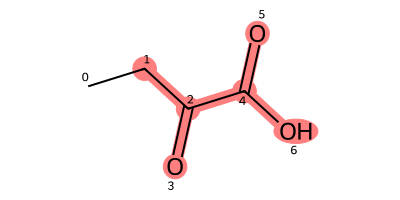

[50, 51, 52, 49]
Example shown: 3306


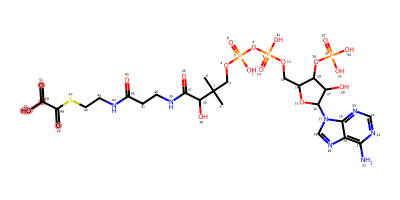

[9, 10, 11, 1, 7, 6, 13]
Example shown: 3306


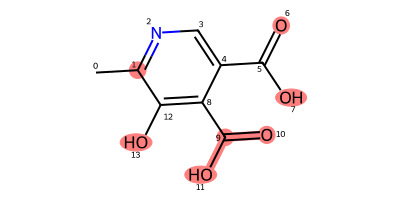

[3, 4, 5, 0]
Example shown: 3306


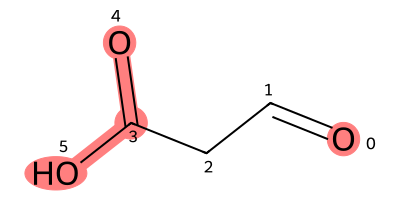

[0, 1, 2, 5, 6, 7, 4, 3, 8]
Example shown: 3306


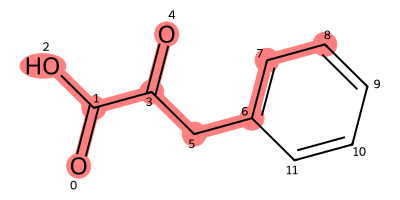

[0, 1, 2, 8, 7, 5]
Example shown: 3306


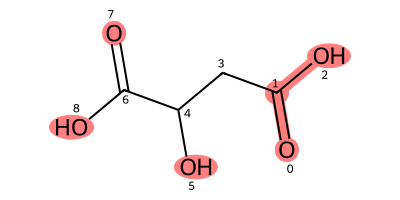

[0, 1, 2, 9, 4, 3, 8]
Example shown: 3306


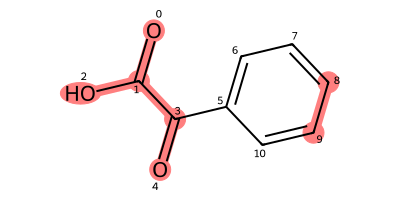

[0, 1, 2, 8, 7, 5]
Example shown: 3306


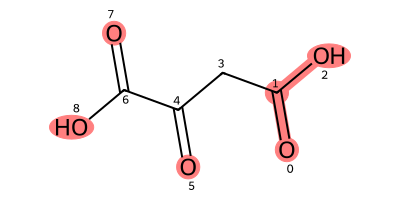

[13, 14, 15, 11, 12, 10]
Example shown: 3306


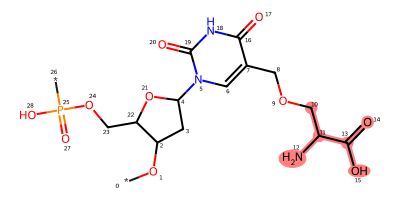

[3, 4, 5, 7, 8]
Example shown: 3306


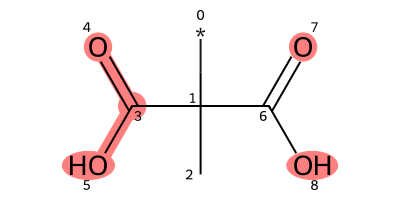

[3, 4, 5, 0]
Example shown: 3306


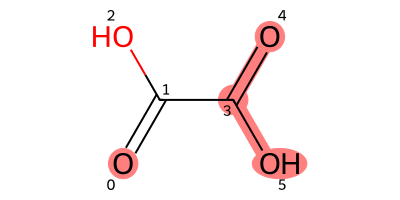

[0, 1, 2, 8, 9, 7]
Example shown: 3306


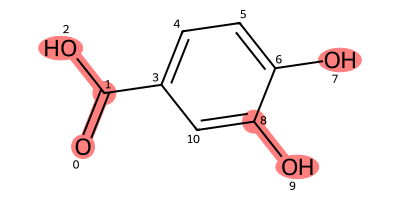

[16, 17, 18, 14, 13]
Example shown: 3306


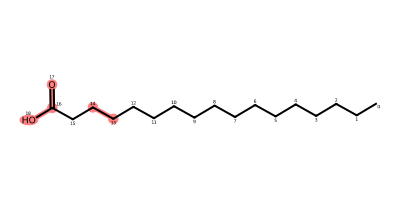

[0, 1, 2, 5, 6, 8]
Example shown: 3306


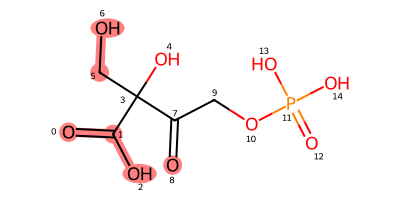

[5, 6, 7, 2, 3, 4]
Example shown: 3306


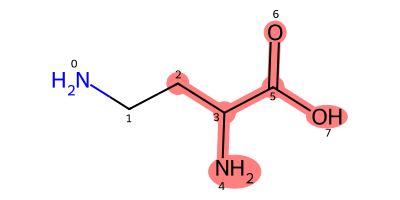

[0, 1, 2]
Example shown: 3306


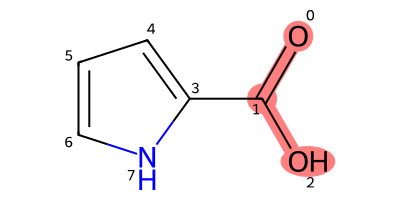

[0, 1, 2, 10, 5, 6, 8]
Example shown: 3306


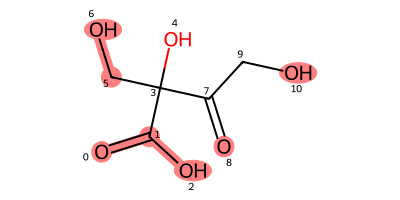

[0, 1, 2, 4, 8, 3, 7, 5]
Example shown: 3306


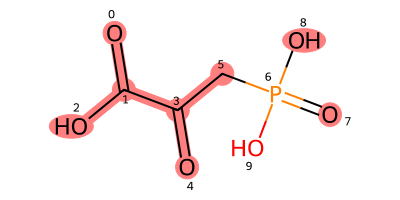

[32, 33, 34, 29, 30, 31, 28]
Example shown: 3306


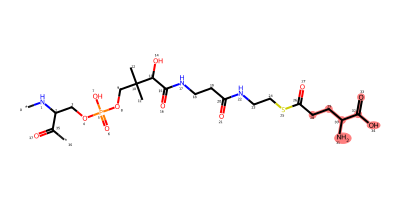

[3, 4, 5, 8, 7]
Example shown: 3306


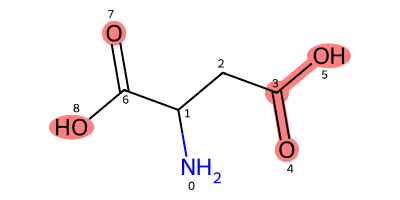

[17, 18, 19, 15, 14]
Example shown: 3306


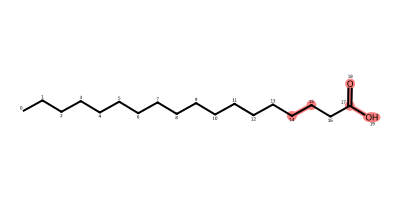

[7, 8, 9, 5, 4]
Example shown: 3306


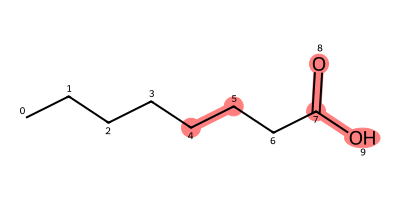

[9, 10, 11, 6, 7, 8, 5]
Example shown: 3306


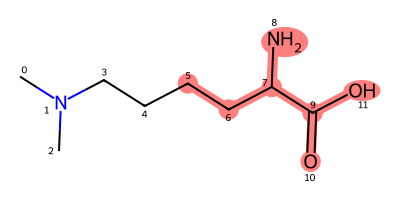

[13, 14, 15, 11, 10]
Example shown: 3306


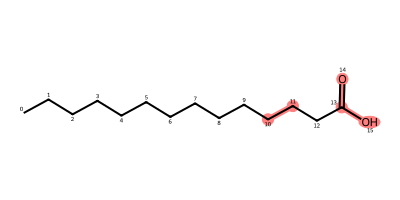

[6, 7, 8, 3, 4, 5]
Example shown: 3306


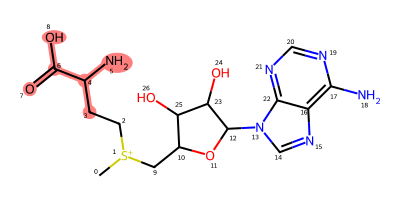

[4, 5, 6, 1, 0, 2]
Example shown: 3306


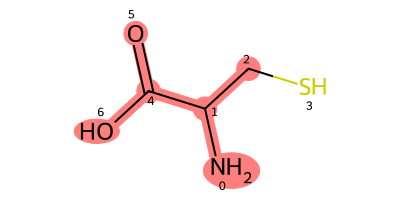

[8, 9, 10, 3, 6]
Example shown: 3306


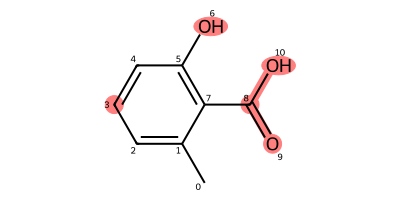

[0, 1, 2, 12, 11, 8]
Example shown: 3306


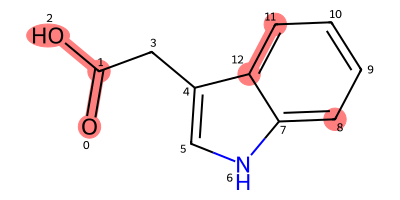

[16, 17, 18, 1, 0, 2]
Example shown: 3306


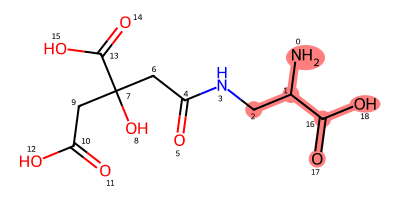

[6, 7, 8, 3, 5, 4]
Example shown: 3306


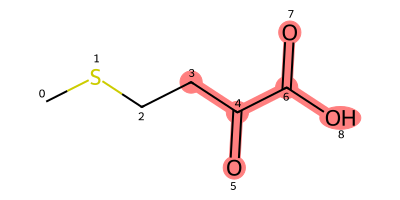

[0, 1, 2, 7, 6, 8, 10]
Example shown: 3306


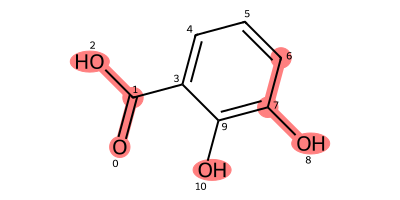

[3, 4, 5]
Example shown: 3306


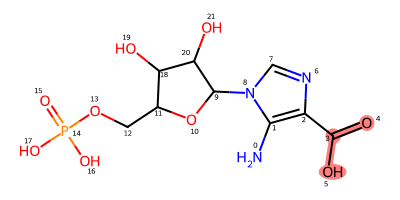

[0, 1, 2, 7, 5]
Example shown: 3306


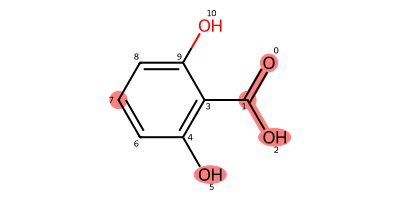

[0, 1, 2, 3, 6]
Example shown: 3306


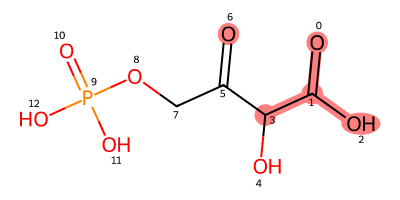

[29, 30, 31, 27]
Example shown: 3306


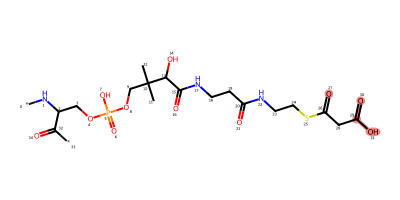

[32, 33, 34, 30, 31, 29, 27]
Example shown: 3306


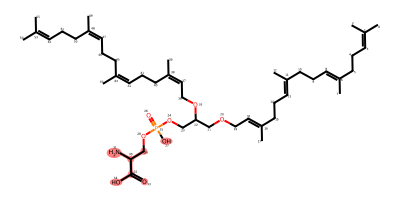

[0, 1, 2, 34, 32, 36]
Example shown: 3306


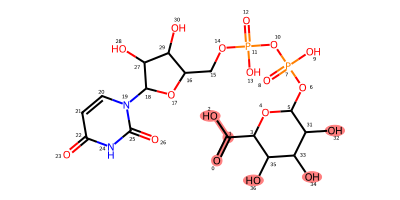

[6, 7, 8, 3, 4, 5, 2]
Example shown: 3306


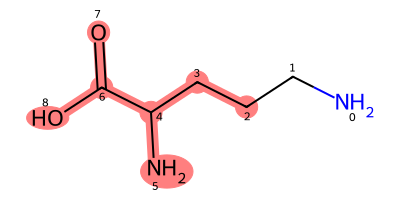

[3, 4, 5, 2]
Example shown: 3306


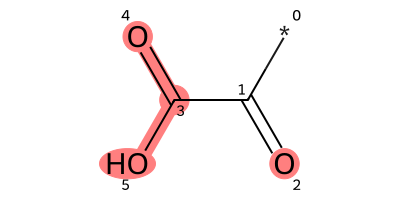

[20, 21, 22, 16, 5, 2, 15, 18]
Example shown: 3306


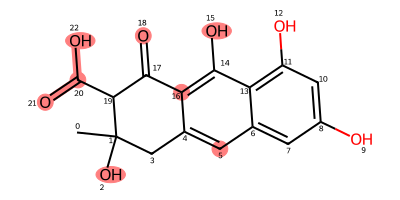

[4, 5, 6, 2]
Example shown: 3306


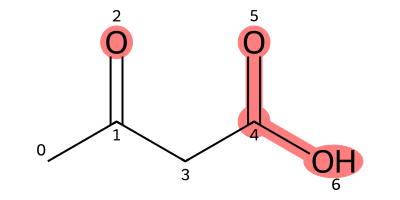

[9, 10, 11, 7, 8, 5]
Example shown: 3306


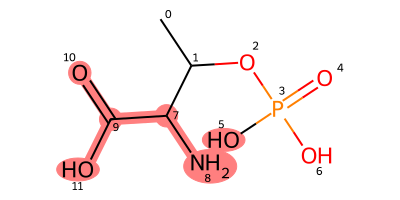

[0, 1, 2, 5, 6, 7, 4, 3, 13]
Example shown: 3306


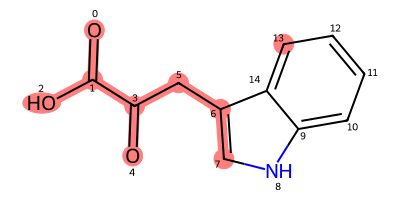

[10, 11, 12, 2, 1, 0, 3]
Example shown: 3306


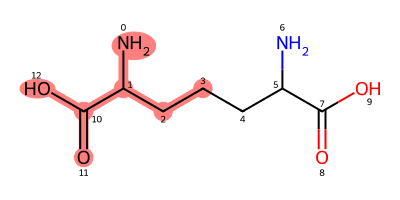

[2, 3, 4, 6]
Example shown: 3306


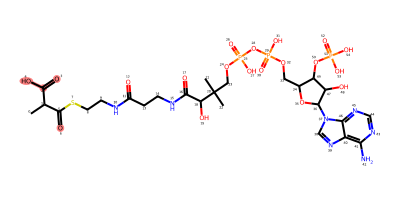

[3, 4, 5, 2, 1]
Example shown: 3306


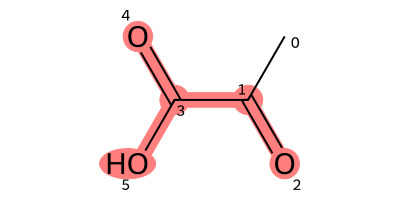

[3, 4, 5, 1, 7]
Example shown: 3306


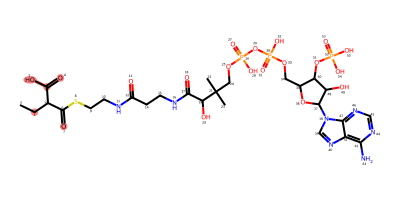

[9, 10, 11, 6, 8, 5, 7]
Example shown: 3306


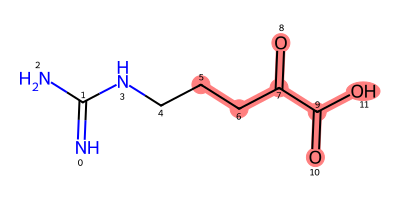

[0, 1, 2, 5, 6, 10]
Example shown: 3306


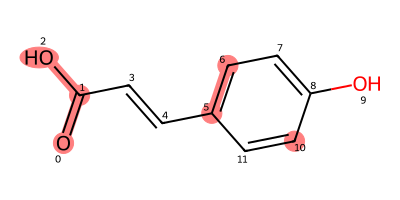

[22, 23, 24, 19, 17, 20]
Example shown: 3306


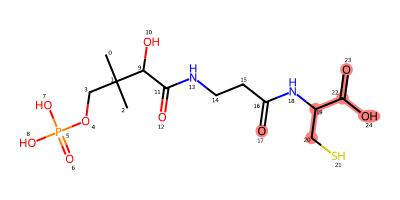

[6, 7, 8, 2]
Example shown: 3306


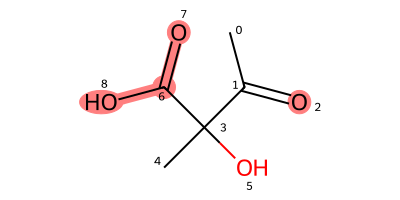

[0, 1, 2, 11, 5, 10, 8]
Example shown: 3306


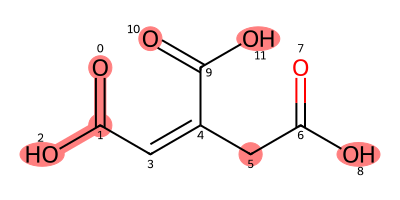

[7, 8, 9, 2, 1, 0, 3, 6]
Example shown: 3306


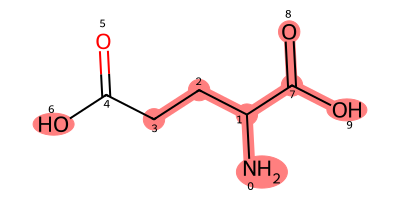

[7, 8, 9, 4, 3, 11]
Example shown: 3306


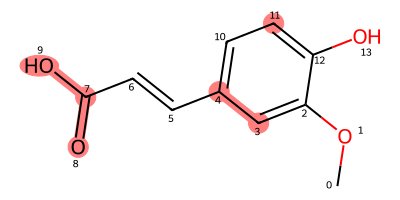

[6, 7, 8, 3, 5, 4]
Example shown: 3306


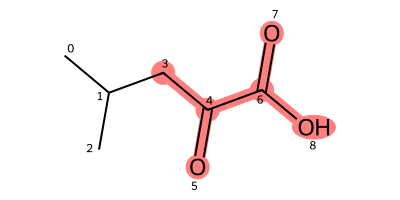

[10, 11, 12, 7, 8, 9]
Example shown: 3306


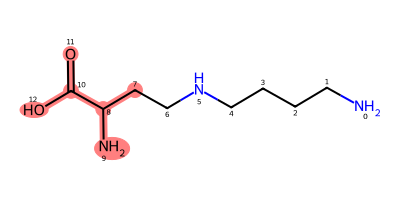

[9, 10, 11, 6, 7, 8, 5]
Example shown: 3306


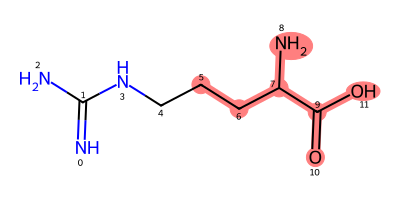

[12, 13, 14, 2, 1, 0, 3, 4, 10]
Example shown: 3306


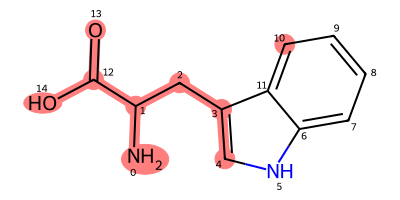

[0, 1, 2, 3, 8, 6, 10]
Example shown: 3306


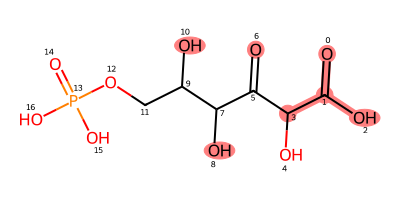

[0, 1, 2, 5, 6, 9]
Example shown: 3306


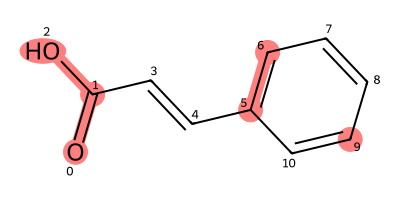

[8, 9, 10, 2, 1, 0, 3, 4, 6]
Example shown: 3306


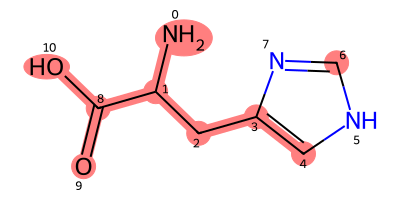

[6, 7, 8, 1, 0, 5, 4, 2]
Example shown: 3306


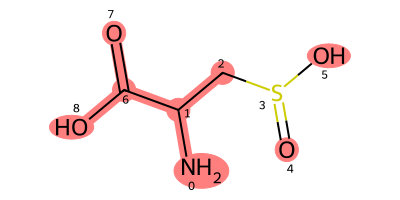

[11, 12, 13, 2, 1, 0, 3, 4, 5]
Example shown: 3306


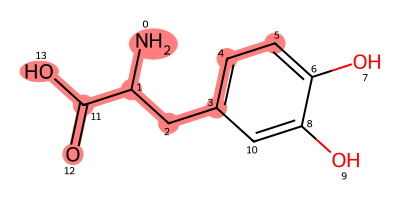

[9, 10, 11, 2, 1, 0, 3, 4, 5]
Example shown: 3306


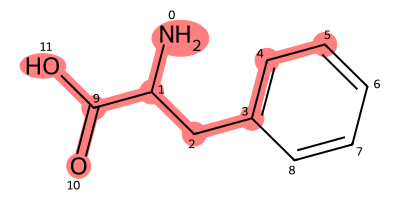

[0, 1, 2, 4, 9, 3, 8, 5]
Example shown: 3306


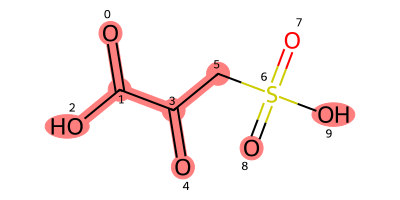

[10, 11, 12, 2, 1, 0, 3, 4, 5]
Example shown: 3306


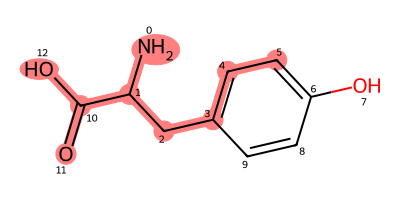

[5, 6, 7, 4, 3]
Example shown: 3306


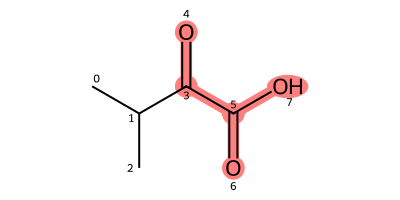

[15, 16, 17, 13, 12]
Example shown: 3306


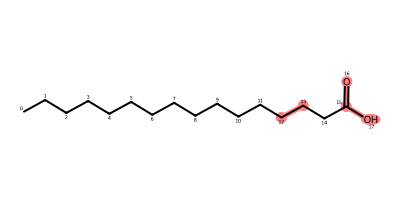

In [ ]:
agg = aggs['max']
lb = 0.15

for name, gb in examples.groupby(by="rxn_id"):
    smarts = gb.iloc[0]['smarts']
    rcts = smarts.split('>>')[0]
    rcts = Chem.MolFromSmiles(rcts)
    aidxs = [atom.GetIdx() for atom in rcts.GetAtoms()]
    sg_idxs = [elt for elt in aidxs if agg(all_atom_probs[f"{name}_{elt}"]) > lb]
    print(sorted(sg_idxs, key=lambda x: agg(all_atom_probs[f"{name}_{x}"]), reverse=True))
    print(f"Example shown: {name}")
    display(SVG(draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})))

Example shown: 10184


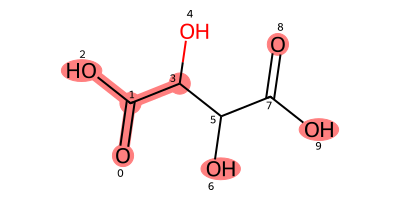

Example shown: 10213


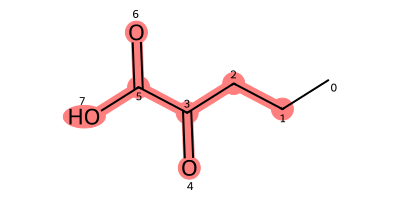

Example shown: 10234


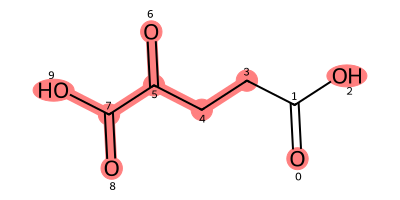

Example shown: 10268


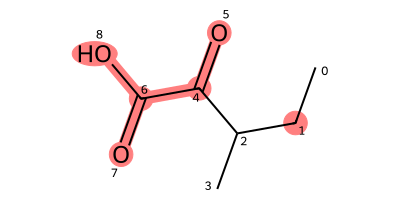

Example shown: 10549


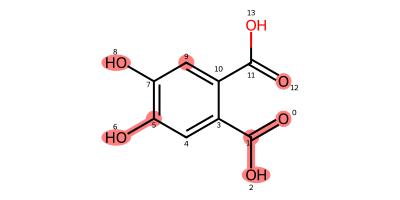

Example shown: 10634


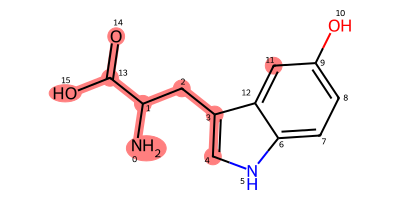

Example shown: 1067


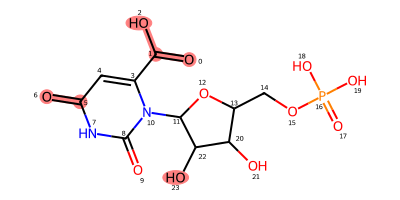

Example shown: 11336


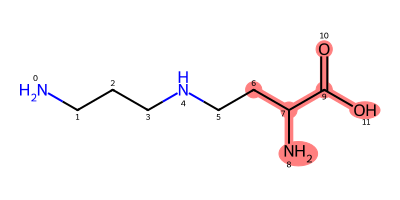

Example shown: 11349


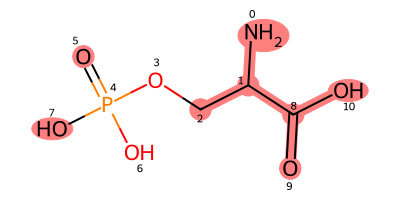

Example shown: 1162


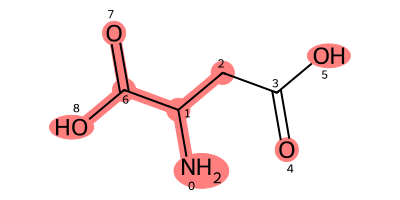

Example shown: 121


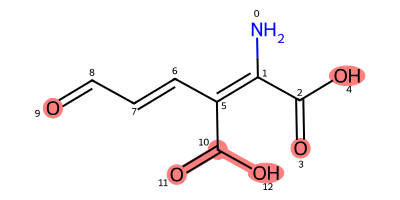

Example shown: 12307


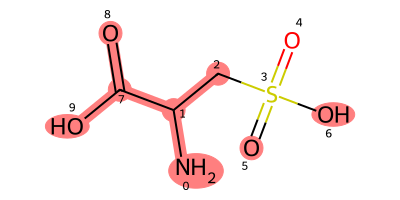

Example shown: 12520


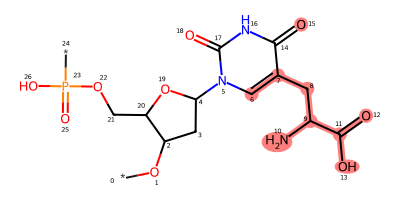

Example shown: 12619


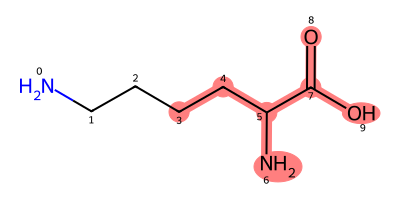

Example shown: 12879


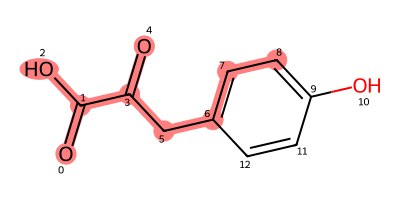

Example shown: 12995


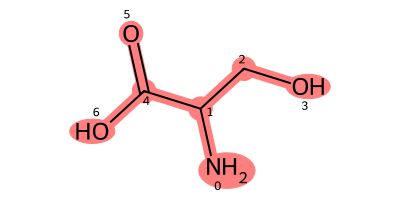

Example shown: 13477


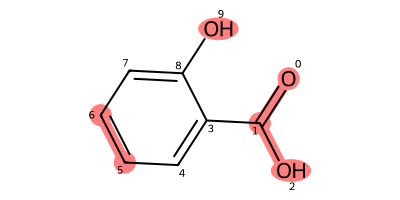

Example shown: 14


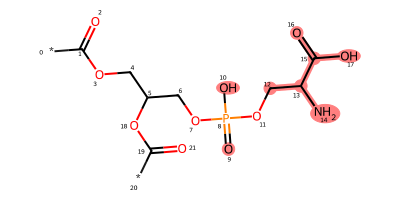

Example shown: 14059


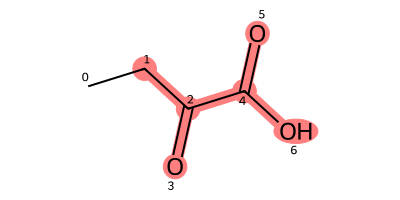

Example shown: 14478


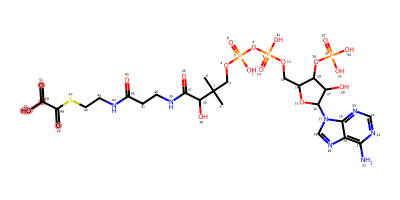

Example shown: 14700


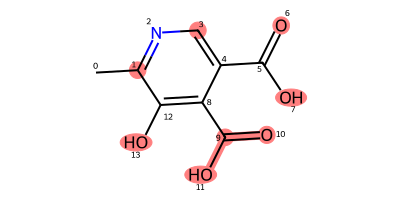

Example shown: 14788


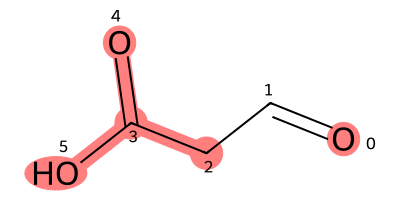

Example shown: 14999


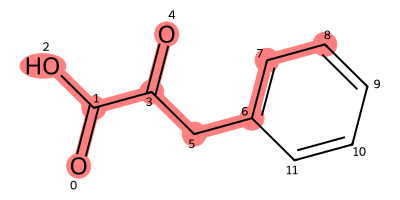

Example shown: 15374


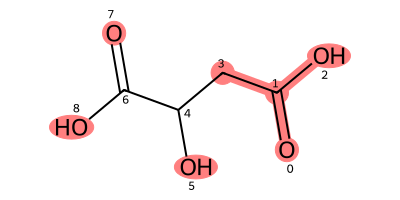

Example shown: 15539


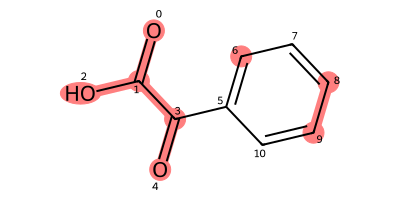

Example shown: 1565


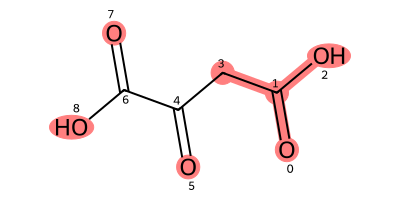

Example shown: 15761


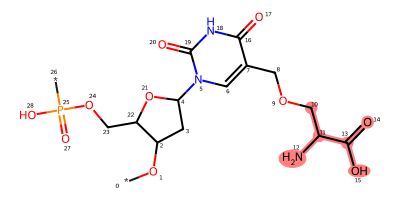

Example shown: 15876


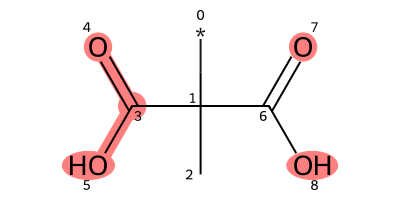

Example shown: 16170


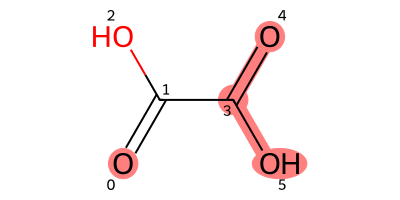

Example shown: 16353


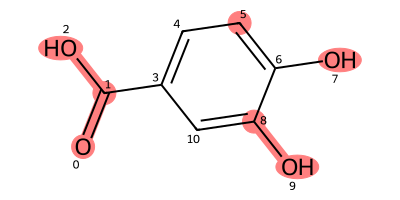

Example shown: 16361


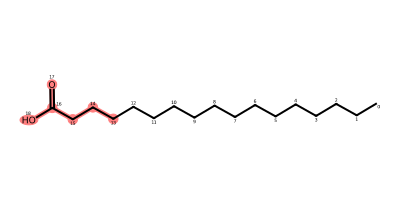

Example shown: 16625


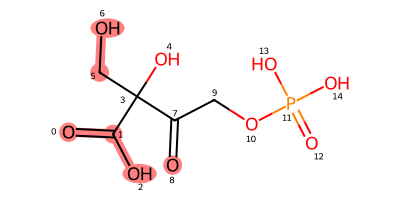

Example shown: 16650


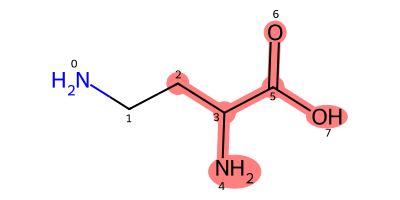

Example shown: 16821


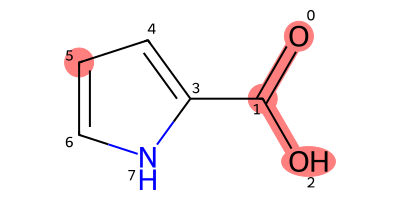

Example shown: 16925


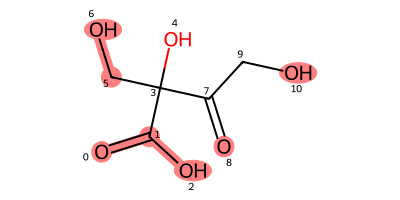

Example shown: 16979


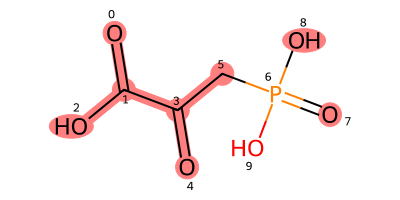

Example shown: 17153


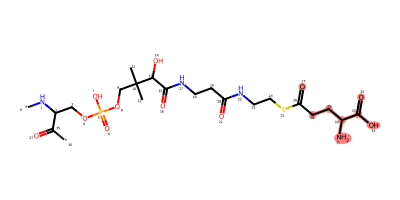

Example shown: 17157


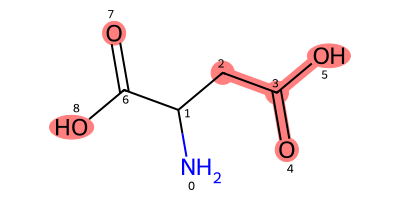

Example shown: 17237


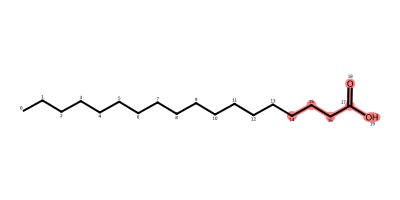

Example shown: 17305


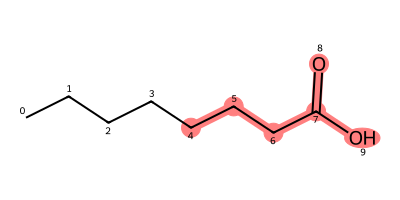

Example shown: 17802


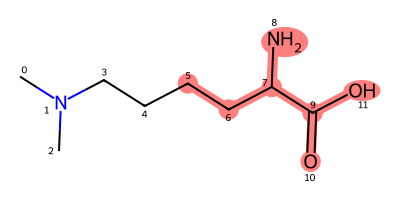

Example shown: 18112


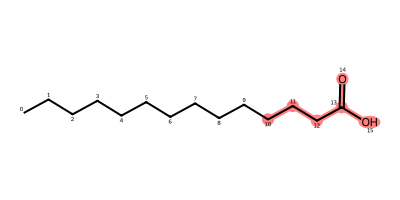

Example shown: 1814


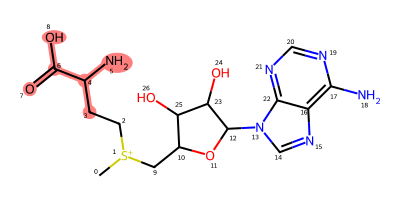

Example shown: 18393


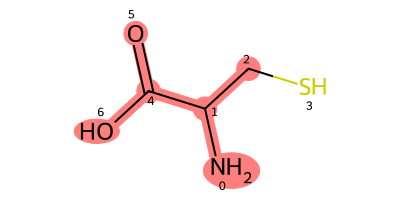

Example shown: 18573


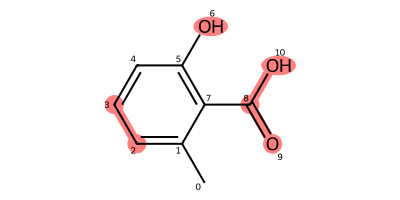

Example shown: 19342


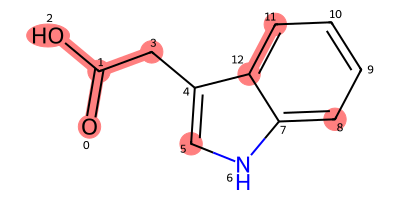

Example shown: 19445


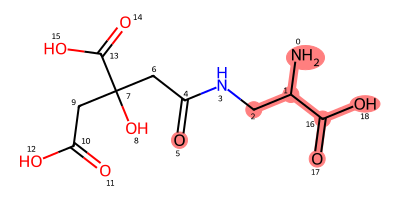

Example shown: 20241


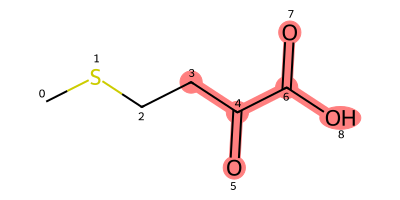

Example shown: 2556


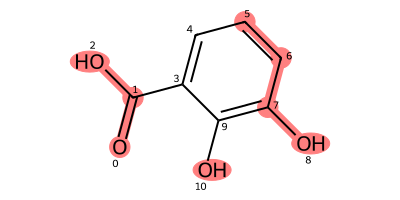

Example shown: 2589


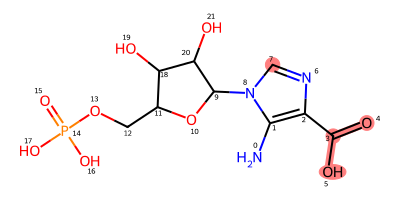

Example shown: 2688


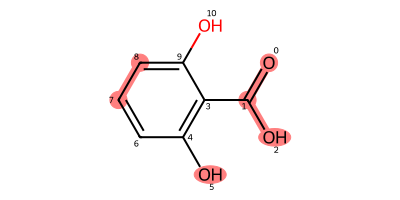

Example shown: 2771


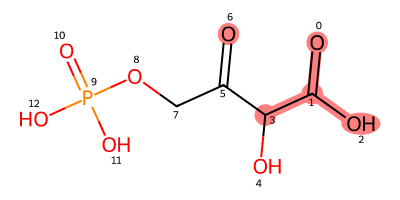

Example shown: 3024


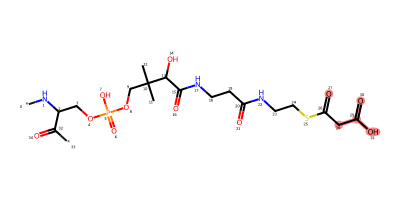

Example shown: 3306


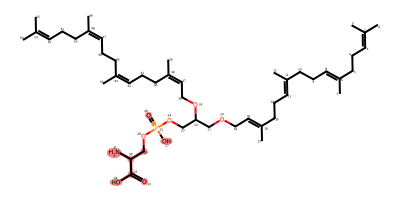

Example shown: 4235


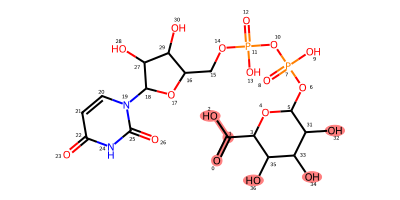

Example shown: 4324


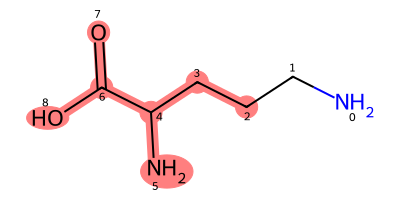

Example shown: 4489


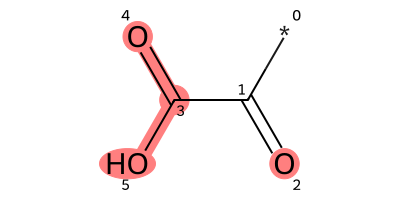

Example shown: 4590


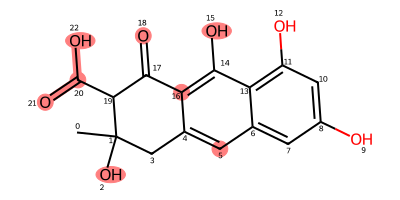

Example shown: 4992


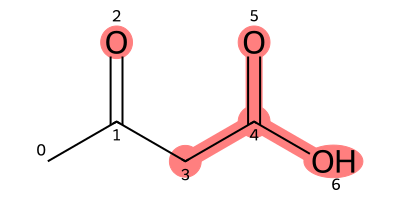

Example shown: 5000


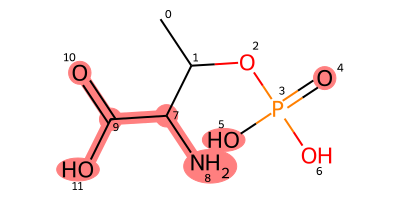

Example shown: 5026


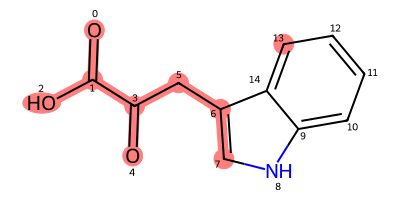

Example shown: 5043


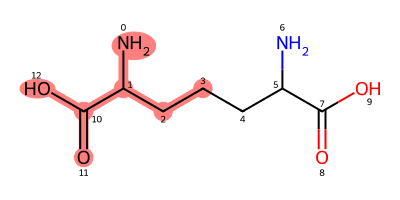

Example shown: 5140


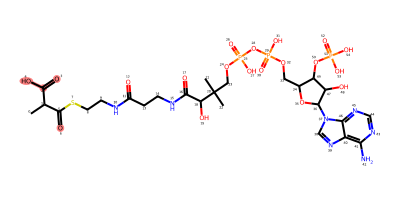

Example shown: 5401


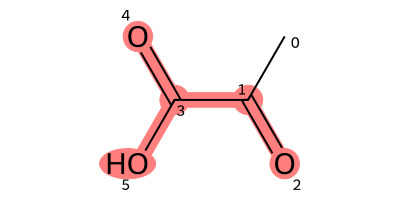

Example shown: 55


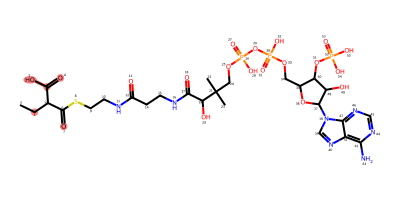

Example shown: 5645


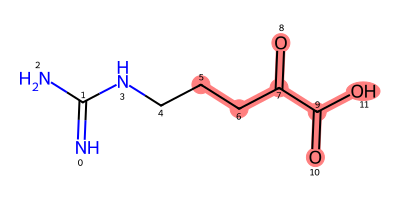

Example shown: 5735


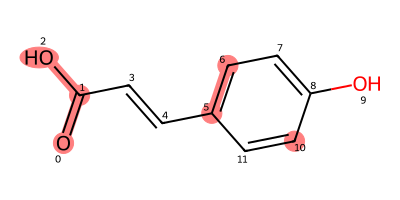

Example shown: 5907


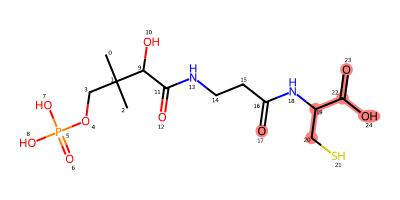

Example shown: 6221


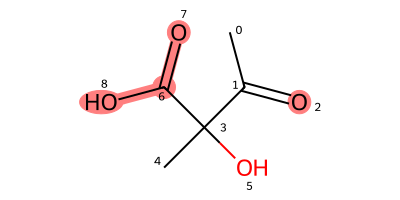

Example shown: 6613


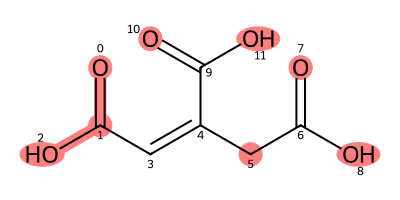

Example shown: 6882


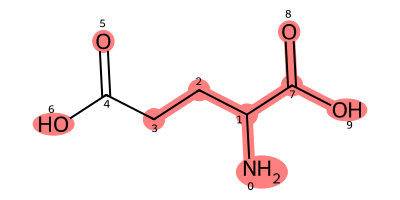

Example shown: 6894


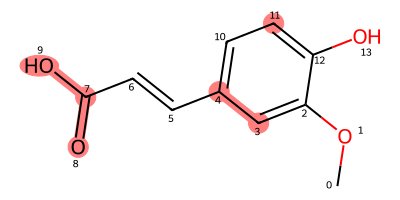

Example shown: 7059


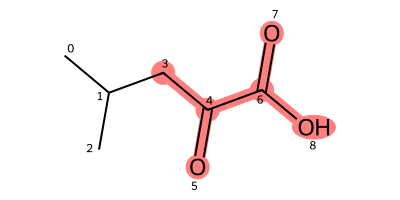

Example shown: 7099


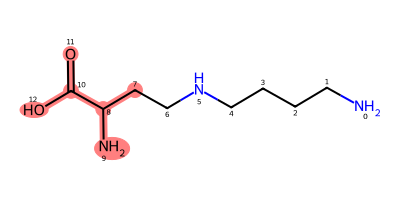

Example shown: 734


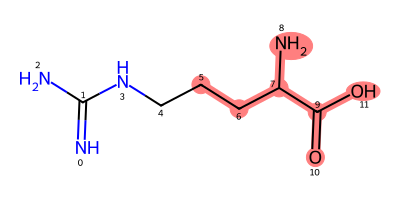

Example shown: 7342


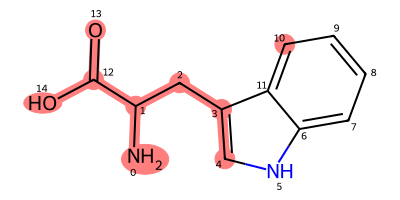

Example shown: 7354


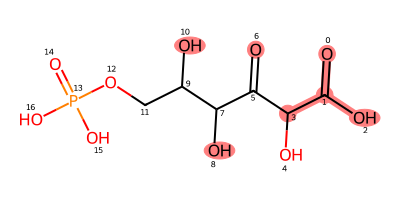

Example shown: 7383


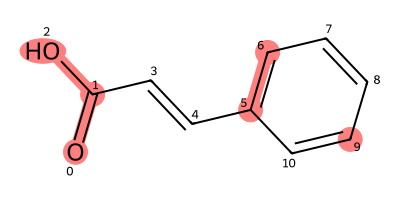

Example shown: 7561


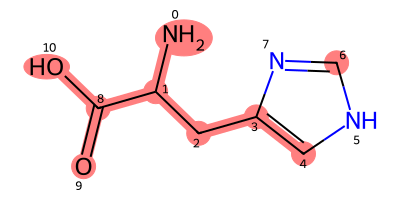

Example shown: 7754


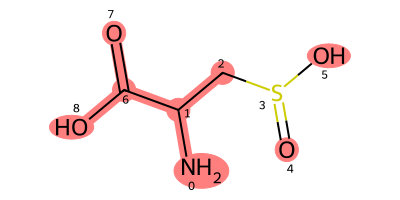

Example shown: 7914


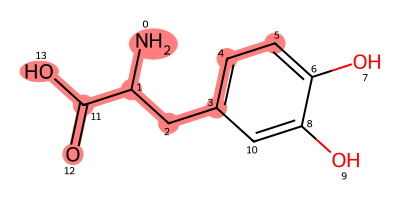

Example shown: 8894


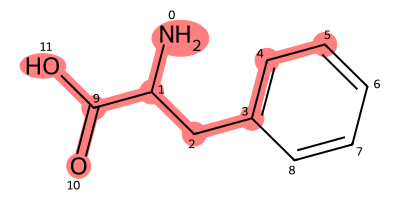

Example shown: 9307


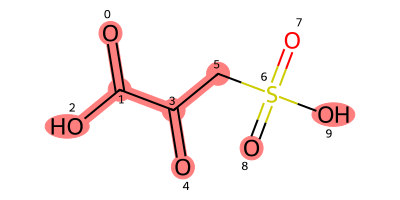

Example shown: 9371


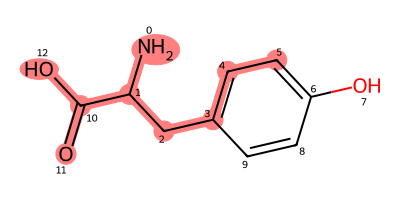

Example shown: 9452


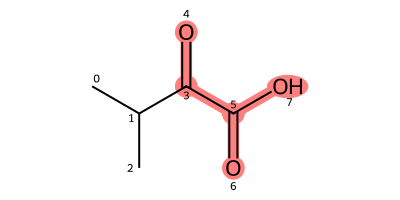

Example shown: 9599


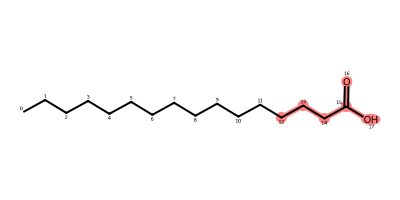

In [ ]:
agg = aggs['max']
scl = 10
lb = scl / embed_mat.shape[0]

for name, gb in examples.groupby(by="rxn_id"):
    smarts = gb.iloc[0]['smarts']
    rcts = smarts.split('>>')[0]
    rcts = Chem.MolFromSmiles(rcts)
    aidxs = [atom.GetIdx() for atom in rcts.GetAtoms()]
    
    sg_idxs = set()
    for _, row in gb.iterrows():
        if p1[row['subgraph_id']] > lb:
            sg_idxs.update(row['sg_idxs'].tolist())

    print(f"Example shown: {name}")
    display(SVG(draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})))

In [28]:
sg_idxs

{np.int64(12), np.int64(13), np.int64(15), np.int64(16), np.int64(17)}